In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

# Nama file zip yang ingin diekstrak
zip_file_path = "/content/drive/MyDrive/Database/cotton_2.zip"

# Direktori tempat Anda ingin mengekstrak file
extract_to_directory = "/content"

# Membuka file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Mengekstrak seluruh isi file ke direktori tertentu
    zip_ref.extractall(extract_to_directory)

print("File zip berhasil diekstrak.")

File zip berhasil diekstrak.


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
# Re-sizing all the Images
IMAGE_SIZE = [224, 224]

train_path = '/content/cotton_2/train'
valid_path = '/content/cotton_2/test'

In [5]:
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/cotton_2/train/*')

In [8]:
# Flatten the input
x = Flatten()(vgg16.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:
# Model Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/cotton_2/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1348 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/cotton_2/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 4 classes.


In [15]:
# Fit the model
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(test_set))

<ipython-input-15-7101ccf945b5>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator( training_set,


Epoch 1/20
43/43 [==============================] - 35s 600ms/step - loss: 0.6600 - accuracy: 0.7678 - val_loss: 0.3784 - val_accuracy: 0.8000
Epoch 2/20
43/43 [==============================] - 22s 516ms/step - loss: 0.1911 - accuracy: 0.9458 - val_loss: 0.4006 - val_accuracy: 0.8500
Epoch 3/20
43/43 [==============================] - 21s 491ms/step - loss: 0.1237 - accuracy: 0.9696 - val_loss: 0.3898 - val_accuracy: 0.8000
Epoch 4/20
43/43 [==============================] - 22s 513ms/step - loss: 0.0746 - accuracy: 0.9815 - val_loss: 0.4475 - val_accuracy: 0.7500
Epoch 5/20
43/43 [==============================] - 20s 475ms/step - loss: 0.0679 - accuracy: 0.9822 - val_loss: 0.1830 - val_accuracy: 0.9500
Epoch 6/20
43/43 [==============================] - 22s 512ms/step - loss: 0.0527 - accuracy: 0.9896 - val_loss: 0.1535 - val_accuracy: 0.9500
Epoch 7/20
43/43 [==============================] - 21s 478ms/step - loss: 0.0311 - accuracy: 0.9963 - val_loss: 0.1948 - val_accuracy: 0.9500

In [16]:
import matplotlib.pyplot as plt

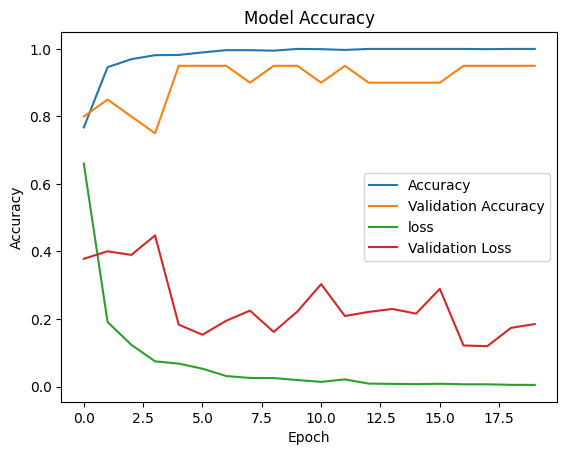

In [17]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [18]:
#Save the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
